In [33]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [34]:
root_dir = os.getcwd() + "/cats_and_dogs_filtered"
print(root_dir)

/mnt/d/MINE/WAI/Assignment-6/Practical-ML-by-WAI/6_deep_learning/CNN/tf_best_practices/cats_and_dogs_filtered


In [35]:
BATCH_SIZE  = 16
EPOCHS = 80
input_img_size = (128,128)
input_shape = (128,128,3)

In [36]:
tf_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rescale=1/255.0,
    fill_mode='nearest',
)
train_ds = tf_generator.flow_from_directory(
    root_dir+"/train",
    target_size=input_img_size,
    batch_size=BATCH_SIZE,
    class_mode='binary'  # or 'categorical'
)
val_ds = tf_generator.flow_from_directory(
    root_dir+"/test",
    target_size=input_img_size,
    batch_size=BATCH_SIZE,
    class_mode='binary'  # or 'categorical'
)
os.path.join(root_dir, "train")

Found 2752 images belonging to 2 classes.
Found 248 images belonging to 2 classes.


'/mnt/d/MINE/WAI/Assignment-6/Practical-ML-by-WAI/6_deep_learning/CNN/tf_best_practices/cats_and_dogs_filtered/train'

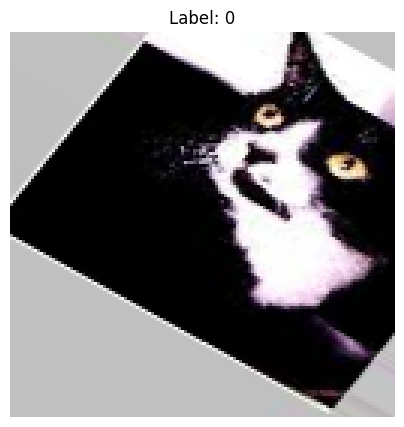

In [37]:
images, labels = next(train_ds)  # get one batch
plt.figure(figsize=(5,5))
plt.imshow(images[0])  # already normalized since rescale=1/255
plt.title(f"Label: {int(labels[0])}")
plt.axis('off')
plt.show()

In [38]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [39]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 832,321 (3.18 MB)

 Trainable params: 831,617 (3.17 MB)

 Non-trainable params: 704 (2.75 KB)

In [40]:
history = model.fit(train_ds,epochs=EPOCHS, validation_data=val_ds,verbose=1)

Epoch 1/80
172/172 ━━━━━━━━━━━━━━━━━━━━ 33s 168ms/step - accuracy: 0.5502 - loss: 1.2778 - val_accuracy: 0.5403 - val_loss: 0.7679
Epoch 2/80
172/172 ━━━━━━━━━━━━━━━━━━━━ 36s 211ms/step - accuracy: 0.5749 - loss: 0.6891 - val_accuracy: 0.5524 - val_loss: 0.7506
Epoch 3/80
172/172 ━━━━━━━━━━━━━━━━━━━━ 23s 130ms/step - accuracy: 0.6350 - loss: 0.6634 - val_accuracy: 0.4839 - val_loss: 0.8690
Epoch 4/80
172/172 ━━━━━━━━━━━━━━━━━━━━ 24s 142ms/step - accuracy: 0.6335 - loss: 0.6554 - val_accuracy: 0.6169 - val_loss: 0.6950
Epoch 5/80
172/172 ━━━━━━━━━━━━━━━━━━━━ 27s 159ms/step - accuracy: 0.6413 - loss: 0.6308 - val_accuracy: 0.5524 - val_loss: 0.7426
Epoch 6/80
172/172 ━━━━━━━━━━━━━━━━━━━━ 30s 176ms/step - accuracy: 0.6332 - loss: 0.6346 - val_accuracy: 0.6895 - val_loss: 0.6038
Epoch 7/80
172/172 ━━━━━━━━━━━━━━━━━━━━ 23s 135ms/step - accuracy: 0.6525 - loss: 0.6284 - val_accuracy: 0.6976 - val_loss: 0.5968
Epoch 8/80
172/172 ━━━━━━━━━━━━━━━━━━━━ 26s 154ms/step - accuracy: 0.6968 - loss: 0

In [55]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.8020 - loss: 0.6044
Validation Loss: 0.5679
Validation Accuracy: 0.8226


In [56]:
BATCH_SIZE
input_shape

(128, 128, 3)

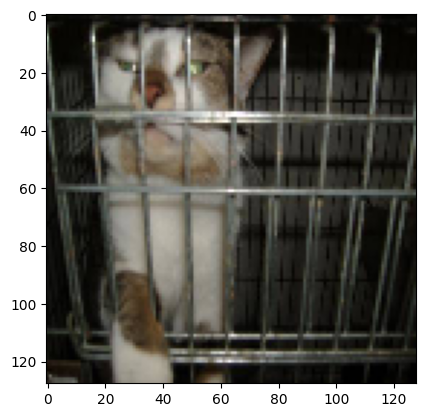

In [57]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_path = root_dir + "/test/cats/cat.2366.jpg"


img = image.load_img(img_path, target_size=input_img_size)
img_array = image.img_to_array(img)  # shape: (_, _, 3)
img_array = img_array / 255.0        # normalize

img_array = np.expand_dims(img_array, axis=0)  # shape: (1, _, _, 3)
plt.imshow(img_array[0])  # Display the image

In [58]:
class_names = train_ds.class_indices

# Convert to dict
class_indices = {name: idx for idx, name in enumerate(class_names)}
print("Class names found:", class_indices)

Class names found: {'cats': 0, 'dogs': 1}


In [59]:
class_names

{'cats': 0, 'dogs': 1}

In [60]:
model.predict(img_array)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


np.float32(0.116072014)

In [64]:
prediction = model.predict(img_array)[0][0]
class_name = "dogs" if prediction > 0.5 else "cats"

print(f"Predicted class: {class_name} with confidence {prediction:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class: cats with confidence 0.12


### Model Saving

In [65]:
import os
from dotenv import load_dotenv
load_dotenv()

ML_Summer_School_ID = os.getenv('ML_Summer_School_ID')
print("Your Sudent ID is: " + ML_Summer_School_ID)

Your Sudent ID is: ML086_HeinNaingAung


In [66]:
model.save(f'./binary_classification/{ML_Summer_School_ID}_model.h5')

In [67]:
import json
# Save class names to a text file
with open(f'./binary_classification/{ML_Summer_School_ID}_class_indices.json', 'w') as f:
    class_names = train_ds.class_indices

    # Convert to dict
    class_indices = {name: idx for idx, name in enumerate(class_names)}
    json.dump(class_indices, f)
